**Weather Images classification Project using AlexNet Architecture**
# Five labelling images are used 
## 1) Cloud 2) Foggy 3) Rain 4) Shine 5) Sunrise





In [1]:
import tensorflow
from tensorflow  import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [2]:
import zipfile
!unrar x "/content/drive/My Drive/weather_images.rar"  


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/weather_images.rar


Would you like to replace the existing file weather_images/test/cloudy/cloudy201.jpg
  3796 bytes, modified on 2020-01-20 08:38
with a new one
  3796 bytes, modified on 2020-01-20 08:38

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit quit

Program aborted


# Five categorical Image Display

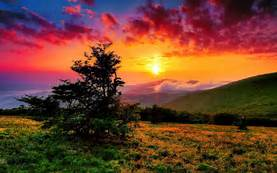

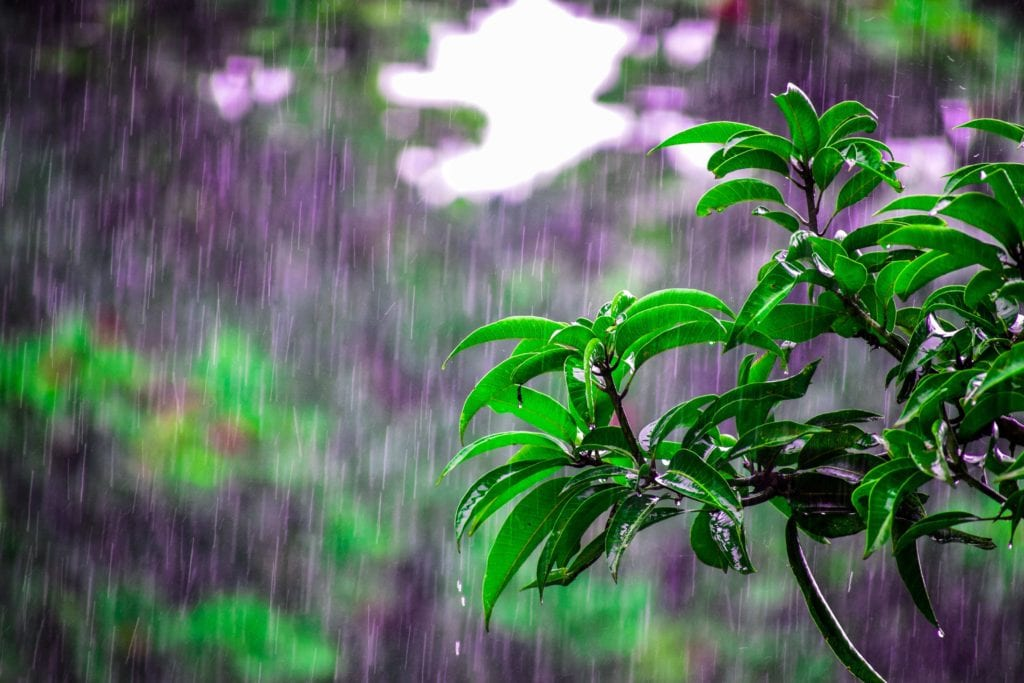

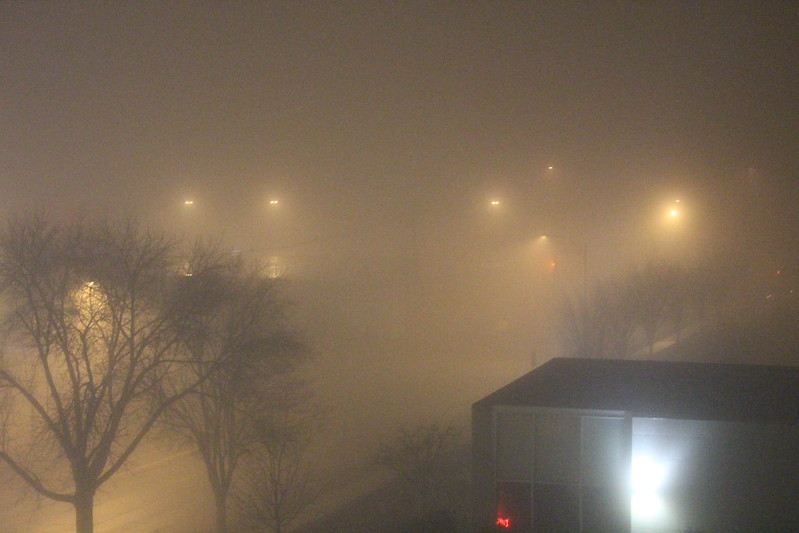

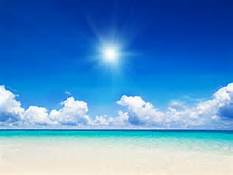

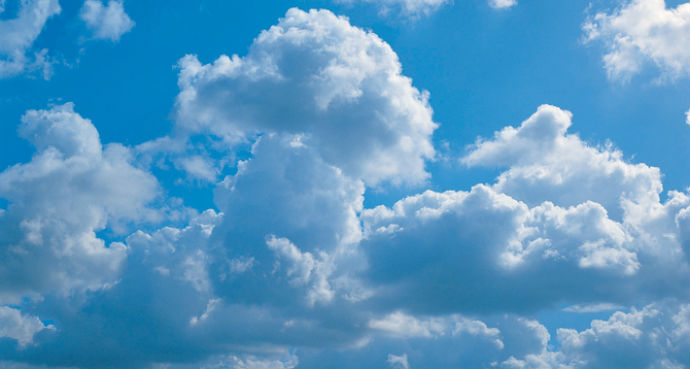

In [23]:
from IPython.display import Image, display
for i in os.listdir('/content/weather_images/valid/'):
  if i.endswith('.jpg'):
    display(Image('/content/weather_images/valid/'+str(i)))

## Call backs class are used to stop the epochs when require accuracy is reached.

In [2]:
class myCallback(keras.callbacks.Callback):
          def on_epoch_end(self, epoch, logs={}):
                if(logs.get('accuracy')>0.99):
                    print("\nReached 99% accuracy so cancelling training!")
                    self.model.stop_training = True

## This is my own architecture builded

In [7]:
## My own architecture 
#############   Run this only if u need ###########
###### if not go to ALEXnet next cell ###################
callbacks=myCallback()
classifier = Sequential()
classifier.add(Conv2D(32,(3,3), input_shape=(248,248,3),activation = 'relu'))
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(Conv2D(64,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.2))



classifier.add(Flatten()) # Flattening the 2D arrays for fully connected layers
classifier.add(Dense(256, activation='relu',input_shape=(248*248*3,)))

classifier.add(Dense(256, activation='relu'))
#classifier.add(Dropout(0.2))

classifier.add(Dense(5,activation='softmax'))

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 246, 246, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 244, 244, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 118, 118, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 222784)           

## Alexnet architecture  year 2012 developed by


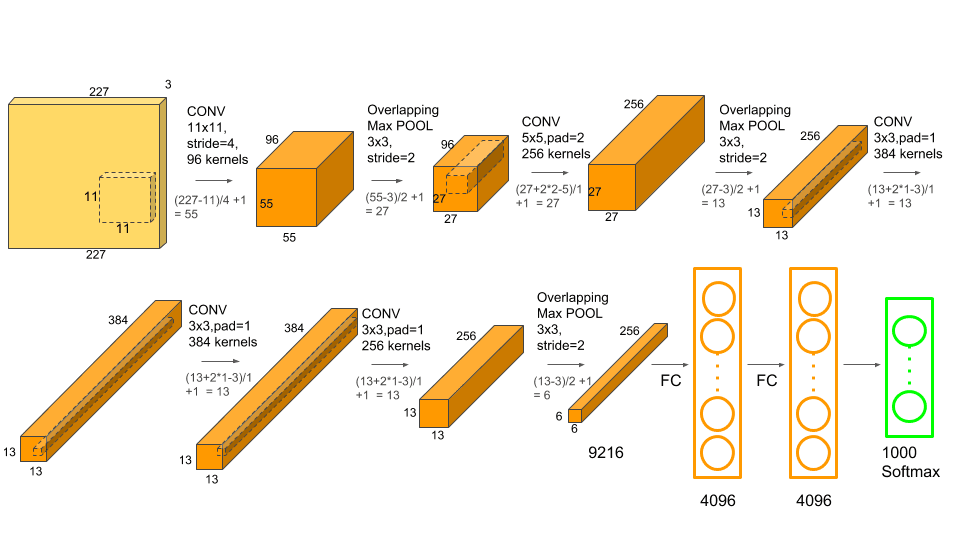

In [41]:
from IPython.display import Image, display

display(Image('/content/weather_images/valid/AlexNet-1.png'))

In [24]:
########### AlexNet  ####################
callbacks=myCallback()

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(248,248,3), kernel_size=(11,11),\
                 strides=(4,4), padding='valid',activation='relu'))
#model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid',activation='relu'))
#model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
#model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
#model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
#model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096,activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096,activation='relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000,activation='relu'))
#model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5,activation='softmax'))


model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 60, 60, 96)        34944     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 256)       2973952   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 384)        

## Creating train and test data with input image size 248X248 

In [25]:
TRAINING_DIR = '/content/weather_images/train'
train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(248, 248)
)

VALIDATION_DIR = '/content/weather_images/test'
validation_datagen = ImageDataGenerator(rescale= 1/255,
                                        shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(248, 248)
)


Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


## Compiling the model with 
### loss as Categorical_cross_entropy
### Metric as Accuracy
### Optimizer as Ada momentum

In [27]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit_generator(train_generator,epochs=100,
                                   validation_data=validation_generator)

32/32 [==============================] - 31s 968ms/step - loss: 0.1634 - accuracy: 0.9460 - val_loss: 0.9490 - val_accuracy: 0.7440


### Model saving 

In [29]:
classifier.save("model.h5")
print("Saved model to disk")


Saved model to disk


### Train, Test data performance with Accuracy and Epochs

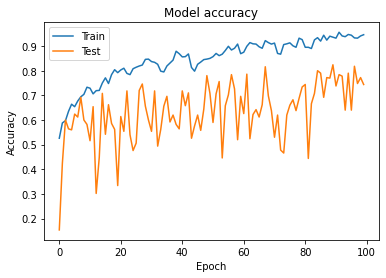

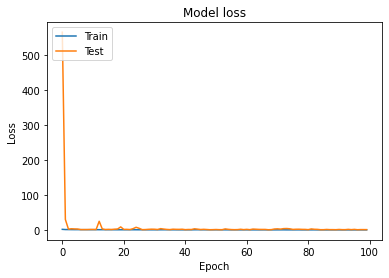

In [30]:
import matplotlib.pyplot as plt


history = history
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Checking the model performance  results with unseen Data 

In [45]:
import numpy as np
from keras.preprocessing import image
import os

for i in os.listdir('/content/weather_images/validation/'):
  if i.endswith('.jpg'):
    test_image = image.load_img('/content/weather_images/validation/'+str(i),target_size = (248, 248))

    test_image = image.img_to_array(test_image)
    #print(test_image.shape)
    test_image = np.expand_dims(test_image, axis = 0)
    #print(test_image.shape)


    result = classifier.predict(test_image)

    print(result)



    if result[0][0] == 1:
      prediction = 'cloudy'
      print(prediction)
    elif result[0][1]==1:
      prediction = 'foggy'
      print(prediction)
    elif result[0][2]==1:
      prediction = 'rainy'
      print(prediction)
    elif result[0][3]==1:
      prediction = 'shine'
      print(prediction)
    else:
      prediction = 'sunrise'
      print(prediction)

[[0. 0. 0. 0. 1.]]
sunrise
[[0. 0. 0. 1. 0.]]
shine
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 0. 1.]]
sunrise
[[0.0000000e+00 0.0000000e+00 3.8520955e-23 1.0000000e+00 0.0000000e+00]]
shine
[[0. 0. 1. 0. 0.]]
rainy
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 1. 0.]]
shine
[[0. 0. 0. 0. 1.]]
sunrise
[[0. 1. 0. 0. 0.]]
foggy
[[0. 1. 0. 0. 0.]]
foggy
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 1. 0.]]
shine
[[0. 0. 0. 0. 1.]]
sunrise
[[0. 0. 0. 0. 1.]]
sunrise
[[0. 0. 0. 0. 1.]]
sunrise
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 0. 1.]]
sunrise
[[0. 1. 0. 0. 0.]]
foggy
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 1. 0.]]
shine
[[0. 0. 0. 1. 0.]]
shine
[[0. 1. 0. 0. 0.]]
foggy
[[0. 1. 0. 0. 0.]]
foggy
[[0. 0. 0. 1. 0.]]
shine
